In [1]:
# Import the required libraries and dependencies
import numpy as np
import pandas as pd

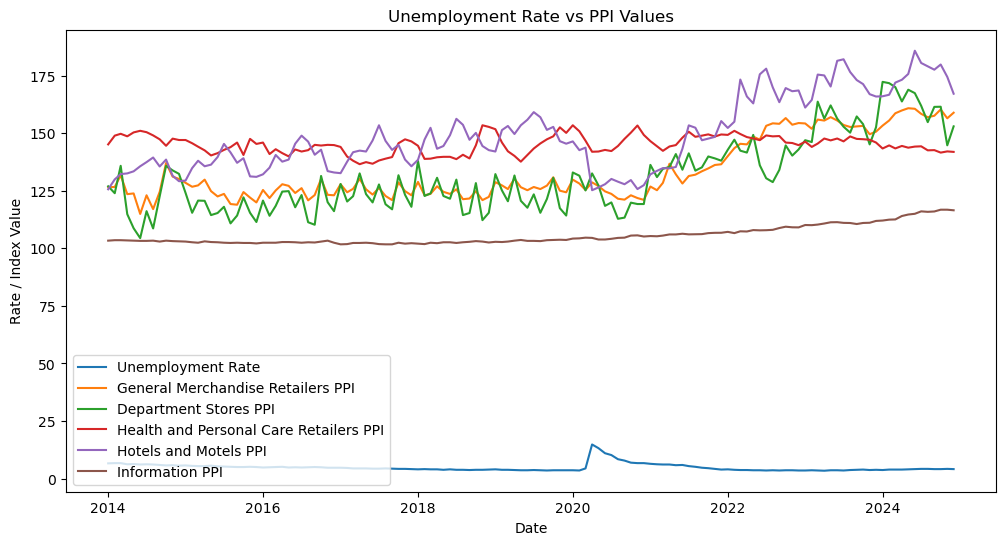

                   Unemployment Rate  Value_gmr  Value_dps  Value_hpcr  \
Unemployment Rate           1.000000  -0.360582  -0.292776   -0.029835   
Value_gmr                  -0.360582   1.000000   0.906909    0.106728   
Value_dps                  -0.292776   0.906909   1.000000    0.064304   
Value_hpcr                 -0.029835   0.106728   0.064304    1.000000   
Value_hm                   -0.603855   0.857562   0.746791    0.001170   
Value_i                    -0.238462   0.921181   0.861698    0.131859   

                   Value_hm   Value_i  
Unemployment Rate -0.603855 -0.238462  
Value_gmr          0.857562  0.921181  
Value_dps          0.746791  0.861698  
Value_hpcr         0.001170  0.131859  
Value_hm           1.000000  0.793240  
Value_i            0.793240  1.000000  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from files
df_gmr = pd.read_csv("../group3-project-25.02.01/CovidData/General merchandise retailers.csv")
df_dps = pd.read_csv("../group3-project-25.02.01/CovidData/Department stores.csv")
df_HPCR = pd.read_csv("../group3-project-25.02.01/CovidData/Health and personal care retailers.csv")
df_HM = pd.read_csv("../group3-project-25.02.01/CovidData/Hotels (exc casino hotels) and motels.csv")
df_I = pd.read_csv("../group3-project-25.02.01/CovidData/Information.csv")
df_unemployment = pd.read_csv("../group3-project-25.02.01/CovidData/UnemploymentRate.csv")

# Convert the 'Period' column to a proper date format in PPI data
df_gmr['Date'] = pd.to_datetime(df_gmr['Year'].astype(str) + df_gmr['Period'].str[1:], format='%Y%m')
df_dps['Date'] = pd.to_datetime(df_dps['Year'].astype(str) + df_dps['Period'].str[1:], format='%Y%m')
df_HPCR['Date'] = pd.to_datetime(df_HPCR['Year'].astype(str) + df_HPCR['Period'].str[1:], format='%Y%m')
df_HM['Date'] = pd.to_datetime(df_HM['Year'].astype(str) + df_HM['Period'].str[1:], format='%Y%m')
df_I['Date'] = pd.to_datetime(df_I['Year'].astype(str) + df_I['Period'].str[1:], format='%Y%m')

# Reshape the unemployment data to long format
df_unemployment_long = pd.melt(df_unemployment, id_vars=['Year'], var_name='Month', value_name='Unemployment Rate')
df_unemployment_long['Date'] = pd.to_datetime(df_unemployment_long['Year'].astype(str) + df_unemployment_long['Month'], format='%Y%b')

# Rename PPI value columns explicitly before merging
df_gmr.rename(columns={'Value': 'Value_gmr'}, inplace=True)
df_dps.rename(columns={'Value': 'Value_dps'}, inplace=True)
df_HPCR.rename(columns={'Value': 'Value_hpcr'}, inplace=True)
df_HM.rename(columns={'Value': 'Value_hm'}, inplace=True)
df_I.rename(columns={'Value': 'Value_i'}, inplace=True)

# Remove duplicates in the PPI data frames
df_gmr = df_gmr.drop_duplicates(subset='Date')
df_dps = df_dps.drop_duplicates(subset='Date')
df_HPCR = df_HPCR.drop_duplicates(subset='Date')
df_HM = df_HM.drop_duplicates(subset='Date')
df_I = df_I.drop_duplicates(subset='Date')

# Merge the datasets and verify columns after each merge
merged_df = df_unemployment_long.merge(df_gmr[['Date', 'Value_gmr']], on='Date', how='left')
merged_df = merged_df.merge(df_dps[['Date', 'Value_dps']], on='Date', how='left')
merged_df = merged_df.merge(df_HPCR[['Date', 'Value_hpcr']], on='Date', how='left')
merged_df = merged_df.merge(df_HM[['Date', 'Value_hm']], on='Date', how='left')
merged_df = merged_df.merge(df_I[['Date', 'Value_i']], on='Date', how='left')

# Remove duplicates in the merged DataFrame
merged_df = merged_df.drop_duplicates(subset=['Date'])

# Sort the DataFrame by Date
merged_df = merged_df.sort_values(by='Date')

# Ensure numeric columns for correlation calculation
numeric_cols = ['Unemployment Rate', 'Value_gmr', 'Value_dps', 'Value_hpcr', 'Value_hm', 'Value_i']
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Unemployment Rate'], label='Unemployment Rate')
plt.plot(merged_df['Date'], merged_df['Value_gmr'], label='General Merchandise Retailers PPI')
plt.plot(merged_df['Date'], merged_df['Value_dps'], label='Department Stores PPI')
plt.plot(merged_df['Date'], merged_df['Value_hpcr'], label='Health and Personal Care Retailers PPI')
plt.plot(merged_df['Date'], merged_df['Value_hm'], label='Hotels and Motels PPI')
plt.plot(merged_df['Date'], merged_df['Value_i'], label='Information PPI')
plt.xlabel('Date')
plt.ylabel('Rate / Index Value')
plt.title('Unemployment Rate vs PPI Values')
plt.legend()
plt.show()

# Calculate correlations
correlation = merged_df[['Unemployment Rate', 'Value_gmr', 'Value_dps', 'Value_hpcr', 'Value_hm', 'Value_i']].corr()
print(correlation)




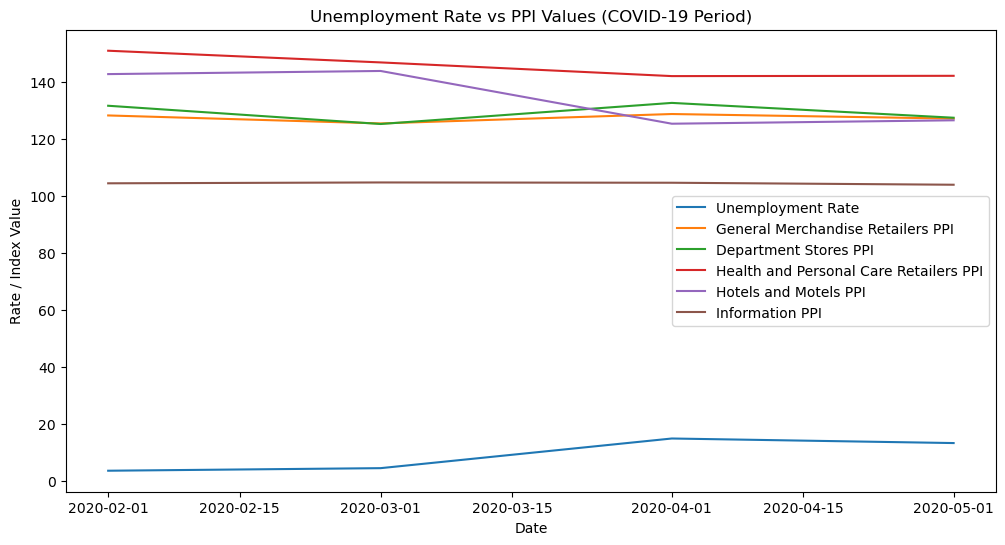

In [4]:
# Define the time period for COVID-19 (e.g., January 2020 to December 2021)
start_date = '2020-02-01'
end_date = '2020-05-01'

# Filter the merged DataFrame for the specified date range
covid_period_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(covid_period_df['Date'], covid_period_df['Unemployment Rate'], label='Unemployment Rate')
plt.plot(covid_period_df['Date'], covid_period_df['Value_gmr'], label='General Merchandise Retailers PPI')
plt.plot(covid_period_df['Date'], covid_period_df['Value_dps'], label='Department Stores PPI')
plt.plot(covid_period_df['Date'], covid_period_df['Value_hpcr'], label='Health and Personal Care Retailers PPI')
plt.plot(covid_period_df['Date'], covid_period_df['Value_hm'], label='Hotels and Motels PPI')
plt.plot(covid_period_df['Date'], covid_period_df['Value_i'], label='Information PPI')
plt.xlabel('Date')
plt.ylabel('Rate / Index Value')
plt.title('Unemployment Rate vs PPI Values (COVID-19 Period)')
plt.legend()
plt.show()


In [33]:
import pandas as pd

def read_and_format_data(file_path, value_name):
    # Read the data from the file
    df = pd.read_csv(file_path)
    
    # Rename columns to match the format of other datasets
    df.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Convert 'Year' column to string
    df['Year'] = df['Year'].astype(str)
    
    # Clean up the data by removing rows with unexpected values and NaN values
    df = df.dropna(subset=['Year'])
    df = df[df['Year'].str.contains(r'^\d{4}$')]
    
    # Reshape the data to long format
    df_long = pd.melt(df, id_vars=['Year'], var_name='Month', value_name=value_name)
    df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + df_long['Month'], format='%Y%b')
    
    return df_long

# Read and format the data
df_AVG_Leisure_long = read_and_format_data("../group3-project-25.02.01/CovidData/AVG_Leisure.csv", 'Avg_Hourly_Wage_Leisure')
df_Avg_MFG_long = read_and_format_data("../group3-project-25.02.01/CovidData/Avg_MFG.csv", 'Avg_Hourly_Wage_MFG')
df_AVG_Finance_long = read_and_format_data("../group3-project-25.02.01/CovidData/AVG_Finance.csv", 'Avg_Hourly_Wage_Finance')
df_AVG_Info_long = read_and_format_data("../group3-project-25.02.01/CovidData/AVG_Info.csv", 'Avg_Hourly_Wage_Info')
df_Num_Leisure_long = read_and_format_data("../group3-project-25.02.01/CovidData/Num_Leisure.csv", 'Num_Employees_Leisure')
df_Num_MFG_long = read_and_format_data("../group3-project-25.02.01/CovidData/Num_MFG.csv", 'Num_Employees_MFG')
df_Num_Finance_long = read_and_format_data("../group3-project-25.02.01/CovidData/Num_Finance.csv", 'Num_Employees_Finance')
df_Num_Info_long = read_and_format_data("../group3-project-25.02.01/CovidData/Num_Info.csv", 'Num_Employees_Info')
df_unemployment_long = read_and_format_data("../group3-project-25.02.01/CovidData/UnemploymentRate.csv", 'Unemployment Rate')

# Verify the first few rows of each DataFrame
print(df_AVG_Leisure_long.head())
print(df_Avg_MFG_long.head())
print(df_AVG_Finance_long.head())
print(df_AVG_Info_long.head())
print(df_Num_Leisure_long.head())
print(df_Num_MFG_long.head())
print(df_Num_Finance_long.head())
print(df_Num_Info_long.head())
print(df_unemployment_long.head())





   Year Month  Avg_Hourly_Wage_Leisure       Date
0  2014   Jan                    13.69 2014-01-01
1  2015   Jan                    14.15 2015-01-01
2  2016   Jan                    14.59 2016-01-01
3  2017   Jan                    15.22 2017-01-01
4  2018   Jan                    15.76 2018-01-01
   Year Month  Avg_Hourly_Wage_MFG       Date
0  2014   Jan                24.67 2014-01-01
1  2015   Jan                24.99 2015-01-01
2  2016   Jan                25.62 2016-01-01
3  2017   Jan                26.39 2017-01-01
4  2018   Jan                26.86 2018-01-01
   Year Month Avg_Hourly_Wage_Finance       Date
0  2014   Jan                   30.36 2014-01-01
1  2015   Jan                   31.14 2015-01-01
2  2016   Jan                   32.10 2016-01-01
3  2017   Jan                   32.64 2017-01-01
4  2018   Jan                   34.27 2018-01-01
   Year Month Avg_Hourly_Wage_Info       Date
0  2014   Jan                33.40 2014-01-01
1  2015   Jan                34.53 201

In [62]:
import pandas as pd

# Read the new data from files
df_AVG_Leisure = pd.read_csv("../group3-project-25.02.01/CovidData/AVG_Leisure.csv")
df_Avg_MFG = pd.read_csv("../group3-project-25.02.01/CovidData/Avg_MFG.csv")
df_AVG_Finance = pd.read_csv("../group3-project-25.02.01/CovidData/AVG_Finance.csv")
df_AVG_Info = pd.read_csv("../group3-project-25.02.01/CovidData/AVG_Info.csv")
df_Num_Leisure = pd.read_csv("../group3-project-25.02.01/CovidData/Num_Leisure.csv")
df_Num_MFG = pd.read_csv("../group3-project-25.02.01/CovidData/Num_MFG.csv")
df_Num_Finance = pd.read_csv("../group3-project-25.02.01/CovidData/Num_Finance.csv")
df_Num_Info = pd.read_csv("../group3-project-25.02.01/CovidData/Num_Info.csv")

# Print columns to check (optional)
print(df_AVG_Finance.columns)
print(df_AVG_Info.columns)

# Reshape the new data to long format
df_AVG_Leisure_long = pd.melt(df_AVG_Leisure, id_vars=['Year'], var_name='Month', value_name='Avg_Hourly_Wage_Leisure')
df_AVG_Leisure_long['Date'] = pd.to_datetime(df_AVG_Leisure_long['Year'].astype(str) + df_AVG_Leisure_long['Month'], format='%Y%b')

df_Avg_MFG_long = pd.melt(df_Avg_MFG, id_vars=['Year'], var_name='Month', value_name='Avg_Hourly_Wage_MFG')
df_Avg_MFG_long['Date'] = pd.to_datetime(df_Avg_MFG_long['Year'].astype(str) + df_Avg_MFG_long['Month'], format='%Y%b')

df_AVG_Finance_long = pd.melt(df_AVG_Finance, id_vars=['Year'], var_name='Month', value_name='Avg_Hourly_Wage_Finance')
df_AVG_Finance_long['Date'] = pd.to_datetime(df_AVG_Finance_long['Year'].astype(str) + df_AVG_Finance_long['Month'], format='%Y%b')

df_AVG_Info_long = pd.melt(df_AVG_Info, id_vars=['Year'], var_name='Month', value_name='Avg_Hourly_Wage_Info')
df_AVG_Info_long['Date'] = pd.to_datetime(df_AVG_Info_long['Year'].astype(str) + df_AVG_Info_long['Month'], format='%Y%b')

df_Num_Leisure_long = pd.melt(df_Num_Leisure, id_vars=['Year'], var_name='Month', value_name='Num_Employees_Leisure')
df_Num_Leisure_long['Date'] = pd.to_datetime(df_Num_Leisure_long['Year'].astype(str) + df_Num_Leisure_long['Month'], format='%Y%b')

df_Num_MFG_long = pd.melt(df_Num_MFG, id_vars=['Year'], var_name='Month', value_name='Num_Employees_MFG')
df_Num_MFG_long['Date'] = pd.to_datetime(df_Num_MFG_long['Year'].astype(str) + df_Num_MFG_long['Month'], format='%Y%b')

df_Num_Finance_long = pd.melt(df_Num_Finance, id_vars=['Year'], var_name='Month', value_name='Num_Employees_Finance')
df_Num_Finance_long['Date'] = pd.to_datetime(df_Num_Finance_long['Year'].astype(str) + df_Num_Finance_long['Month'], format='%Y%b')

df_Num_Info_long = pd.melt(df_Num_Info, id_vars=['Year'], var_name='Month', value_name='Num_Employees_Info')
df_Num_Info_long['Date'] = pd.to_datetime(df_Num_Info_long['Year'].astype(str) + df_Num_Info_long['Month'], format='%Y%b')

# Ensure no duplicate columns in the merged DataFrame
merged_df = merged_df.drop(columns=['Avg_Hourly_Wage_Leisure', 'Avg_Hourly_Wage_MFG', 'Avg_Hourly_Wage_Finance', 'Avg_Hourly_Wage_Info', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info'], errors='ignore')

# Merge the new data with the existing merged DataFrame, using suffixes to avoid conflicts
merged_df = merged_df.merge(df_AVG_Leisure_long[['Date', 'Avg_Hourly_Wage_Leisure']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Avg_MFG_long[['Date', 'Avg_Hourly_Wage_MFG']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_AVG_Finance_long[['Date', 'Avg_Hourly_Wage_Finance']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_AVG_Info_long[['Date', 'Avg_Hourly_Wage_Info']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Num_Leisure_long[['Date', 'Num_Employees_Leisure']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Num_MFG_long[['Date', 'Num_Employees_MFG']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Num_Finance_long[['Date', 'Num_Employees_Finance']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Num_Info_long[['Date', 'Num_Employees_Info']], on='Date', how='left', suffixes=('', '_y'))

# Define the time period for COVID-19 (e.g., January 2020 to December 2021)
start_date = '2020-01-01'
end_date = '2021-12-31'

# Filter the merged DataFrame for the specified date range
covid_period_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Verify the first few rows of the filtered DataFrame (optional)
print(covid_period_df.head())



Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')
Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')
    Year Month  Unemployment Rate       Date  Avg_Hourly_Wage_Leisure  \
6   2020   Jan                3.6 2020-01-01                    16.83   
7   2021   Jan                6.4 2021-01-01                    17.16   
17  2020   Feb                3.5 2020-02-01                    16.90   
18  2021   Feb                6.2 2021-02-01                    17.44   
28  2020   Mar                4.4 2020-03-01                    16.92   

    Avg_Hourly_Wage_MFG  Avg_Hourly_Wage_Finance  Avg_Hourly_Wage_Info  \
6                 28.20                    36.65                 42.84   
7                 29.04                    39.25                 44.37   
17                28.29                    36.89                 43.01   
18     

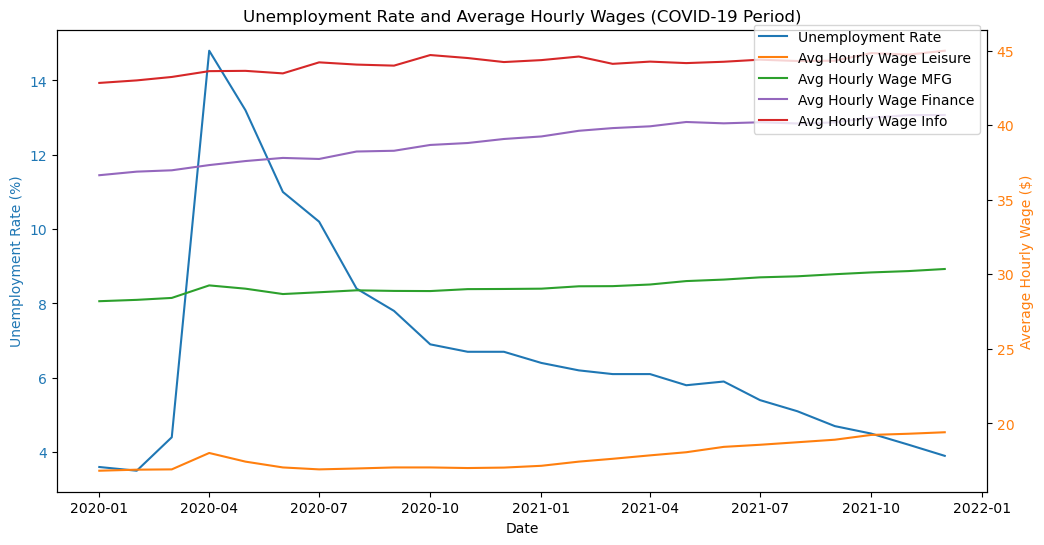

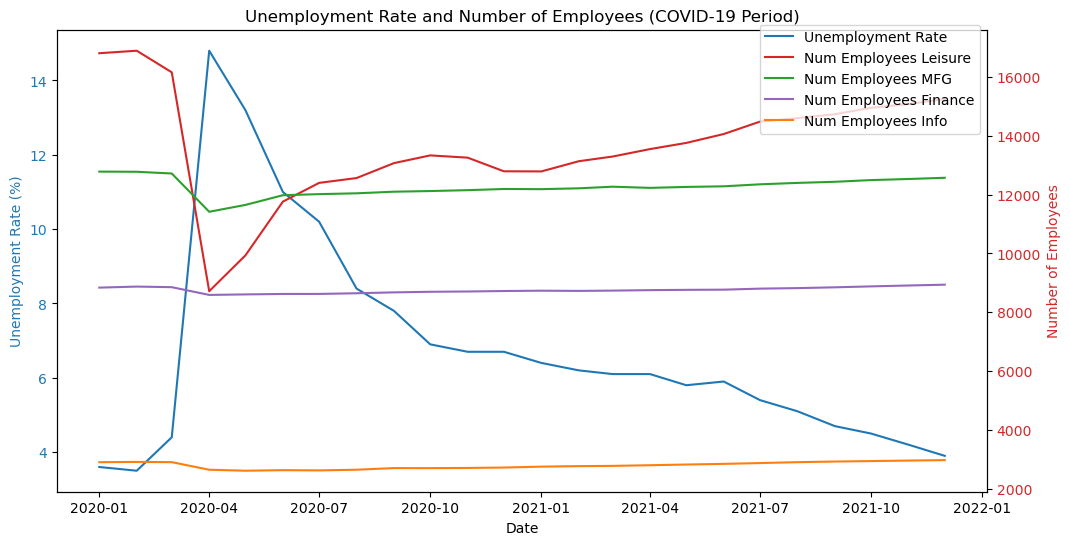

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the new data from files
df_AVG_Leisure = pd.read_csv("../group3-project-25.02.01/CovidData/AVG_Leisure.csv")
df_Avg_MFG = pd.read_csv("../group3-project-25.02.01/CovidData/Avg_MFG.csv")
df_AVG_Finance = pd.read_csv("../group3-project-25.02.01/CovidData/AVG_Finance.csv")
df_AVG_Info = pd.read_csv("../group3-project-25.02.01/CovidData/AVG_Info.csv")
df_Num_Leisure = pd.read_csv("../group3-project-25.02.01/CovidData/Num_Leisure.csv")
df_Num_MFG = pd.read_csv("../group3-project-25.02.01/CovidData/Num_MFG.csv")
df_Num_Finance = pd.read_csv("../group3-project-25.02.01/CovidData/Num_Finance.csv")
df_Num_Info = pd.read_csv("../group3-project-25.02.01/CovidData/Num_Info.csv")

# Rename columns of df_Num_Leisure to match the format of other datasets
df_Num_Leisure.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reshape the new data to long format
df_AVG_Leisure_long = pd.melt(df_AVG_Leisure, id_vars=['Year'], var_name='Month', value_name='Avg_Hourly_Wage_Leisure')
df_AVG_Leisure_long['Date'] = pd.to_datetime(df_AVG_Leisure_long['Year'].astype(str) + df_AVG_Leisure_long['Month'], format='%Y%b')

df_Avg_MFG_long = pd.melt(df_Avg_MFG, id_vars=['Year'], var_name='Month', value_name='Avg_Hourly_Wage_MFG')
df_Avg_MFG_long['Date'] = pd.to_datetime(df_Avg_MFG_long['Year'].astype(str) + df_Avg_MFG_long['Month'], format='%Y%b')

df_AVG_Finance_long = pd.melt(df_AVG_Finance, id_vars=['Year'], var_name='Month', value_name='Avg_Hourly_Wage_Finance')
df_AVG_Finance_long['Date'] = pd.to_datetime(df_AVG_Finance_long['Year'].astype(str) + df_AVG_Finance_long['Month'], format='%Y%b')

df_AVG_Info_long = pd.melt(df_AVG_Info, id_vars=['Year'], var_name='Month', value_name='Avg_Hourly_Wage_Info')
df_AVG_Info_long['Date'] = pd.to_datetime(df_AVG_Info_long['Year'].astype(str) + df_AVG_Info_long['Month'], format='%Y%b')

df_Num_Leisure_long = pd.melt(df_Num_Leisure, id_vars=['Year'], var_name='Month', value_name='Num_Employees_Leisure')
df_Num_Leisure_long['Date'] = pd.to_datetime(df_Num_Leisure_long['Year'].astype(str) + df_Num_Leisure_long['Month'], format='%Y%b')

df_Num_MFG_long = pd.melt(df_Num_MFG, id_vars=['Year'], var_name='Month', value_name='Num_Employees_MFG')
df_Num_MFG_long['Date'] = pd.to_datetime(df_Num_MFG_long['Year'].astype(str) + df_Num_MFG_long['Month'], format='%Y%b')

df_Num_Finance_long = pd.melt(df_Num_Finance, id_vars=['Year'], var_name='Month', value_name='Num_Employees_Finance')
df_Num_Finance_long['Date'] = pd.to_datetime(df_Num_Finance_long['Year'].astype(str) + df_Num_Finance_long['Month'], format='%Y%b')

df_Num_Info_long = pd.melt(df_Num_Info, id_vars=['Year'], var_name='Month', value_name='Num_Employees_Info')
df_Num_Info_long['Date'] = pd.to_datetime(df_Num_Info_long['Year'].astype(str) + df_Num_Info_long['Month'], format='%Y%b')

# Ensure no duplicate columns in the merged DataFrame
merged_df = merged_df.drop(columns=['Avg_Hourly_Wage_Leisure', 'Avg_Hourly_Wage_MFG', 'Avg_Hourly_Wage_Finance', 'Avg_Hourly_Wage_Info', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info'], errors='ignore')

# Merge the new data with the existing merged DataFrame, using suffixes to avoid conflicts
merged_df = merged_df.merge(df_AVG_Leisure_long[['Date', 'Avg_Hourly_Wage_Leisure']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Avg_MFG_long[['Date', 'Avg_Hourly_Wage_MFG']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_AVG_Finance_long[['Date', 'Avg_Hourly_Wage_Finance']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_AVG_Info_long[['Date', 'Avg_Hourly_Wage_Info']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Num_Leisure_long[['Date', 'Num_Employees_Leisure']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Num_MFG_long[['Date', 'Num_Employees_MFG']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Num_Finance_long[['Date', 'Num_Employees_Finance']], on='Date', how='left', suffixes=('', '_y'))
merged_df = merged_df.merge(df_Num_Info_long[['Date', 'Num_Employees_Info']], on='Date', how='left', suffixes=('', '_y'))

# Filter the merged DataFrame for the specified date range
start_date = '2020-01-01'
end_date = '2021-12-31'
covid_period_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Sort the DataFrame by 'Date'
covid_period_df = covid_period_df.sort_values('Date')

# Plot the unemployment rate and average hourly wages
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot unemployment rate on primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.plot(covid_period_df['Date'], covid_period_df['Unemployment Rate'], label='Unemployment Rate', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for average hourly wages
ax2 = ax1.twinx()
ax2.set_ylabel('Average Hourly Wage ($)', color='tab:orange')
ax2.plot(covid_period_df['Date'], covid_period_df['Avg_Hourly_Wage_Leisure'], label='Avg Hourly Wage Leisure', color='tab:orange')
ax2.plot(covid_period_df['Date'], covid_period_df['Avg_Hourly_Wage_MFG'], label='Avg Hourly Wage MFG', color='tab:green')
ax2.plot(covid_period_df['Date'], covid_period_df['Avg_Hourly_Wage_Finance'], label='Avg Hourly Wage Finance', color='tab:purple')
ax2.plot(covid_period_df['Date'], covid_period_df['Avg_Hourly_Wage_Info'], label='Avg Hourly Wage Info', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add legends to the top right
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.title('Unemployment Rate and Average Hourly Wages (COVID-19 Period)')
plt.show()

# Plot the unemployment rate and number of employees
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot unemployment rate on primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.plot(covid_period_df['Date'], covid_period_df['Unemployment Rate'], label='Unemployment Rate', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for number of employees
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Employees', color='tab:red')
ax2.plot(covid_period_df['Date'], covid_period_df['Num_Employees_Leisure'], label='Num Employees Leisure', color='tab:red')
ax2.plot(covid_period_df['Date'], covid_period_df['Num_Employees_MFG'], label='Num Employees MFG', color='tab:green')
ax2.plot(covid_period_df['Date'], covid_period_df['Num_Employees_Finance'], label='Num Employees Finance', color='tab:purple')
ax2.plot(covid_period_df['Date'], covid_period_df['Num_Employees_Info'], label='Num Employees Info', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends to the top right
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.title('Unemployment Rate and Number of Employees (COVID-19 Period)')
plt.show()




Correlation Matrix:
                         Unemployment Rate  Avg_Hourly_Wage_Leisure  \
Unemployment Rate                 1.000000                -0.300623   
Avg_Hourly_Wage_Leisure          -0.300623                 1.000000   
Avg_Hourly_Wage_MFG              -0.229930                 0.954425   
Avg_Hourly_Wage_Finance          -0.417242                 0.786022   
Avg_Hourly_Wage_Info             -0.191399                 0.579478   
Num_Employees_Leisure            -0.940635                 0.196184   
Num_Employees_MFG                -0.945586                 0.206649   
Num_Employees_Finance            -0.888725                 0.577327   
Num_Employees_Info               -0.854478                 0.635715   

                         Avg_Hourly_Wage_MFG  Avg_Hourly_Wage_Finance  \
Unemployment Rate                  -0.229930                -0.417242   
Avg_Hourly_Wage_Leisure             0.954425                 0.786022   
Avg_Hourly_Wage_MFG                 1.000000      

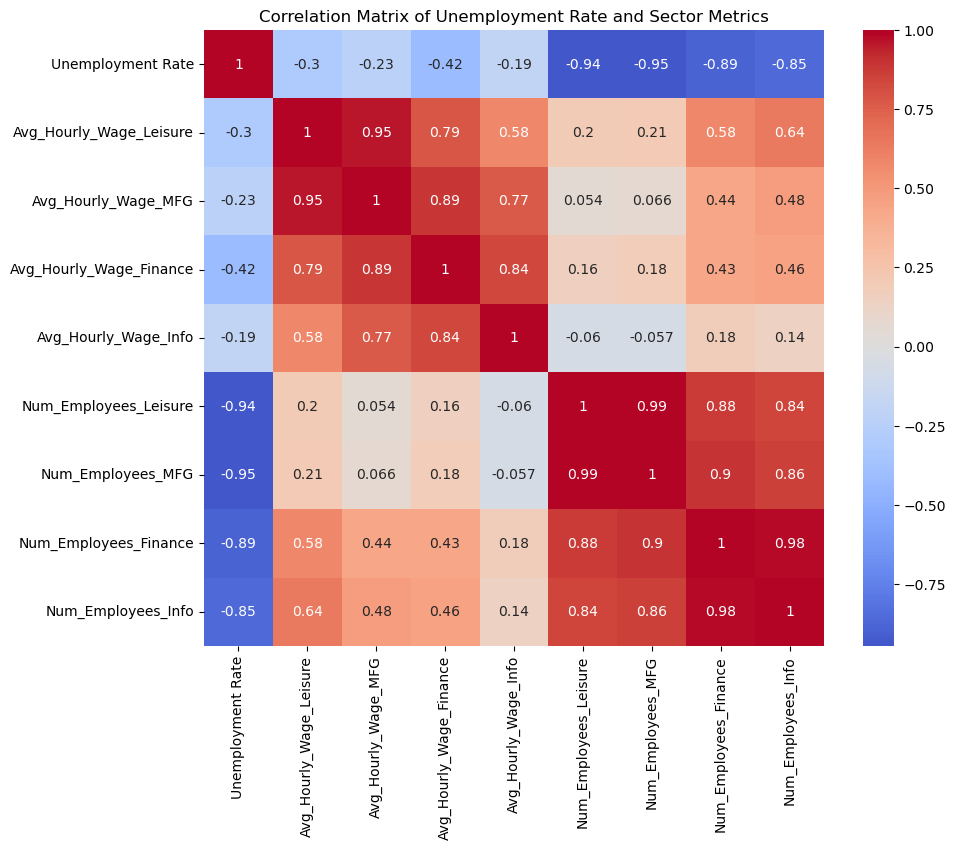

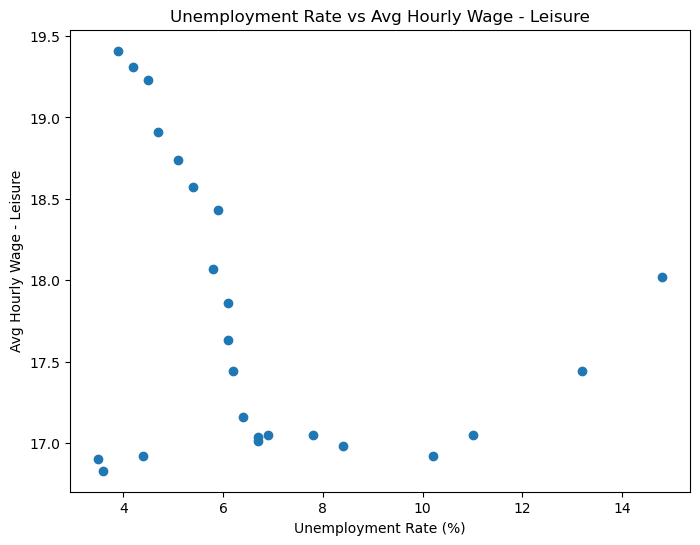

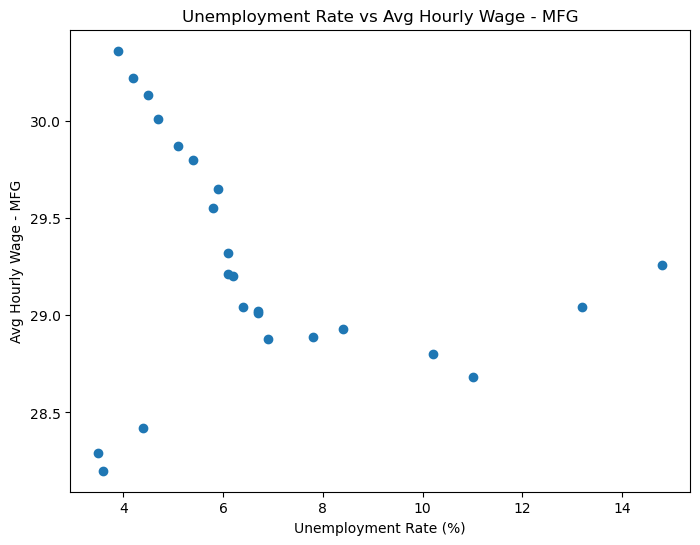

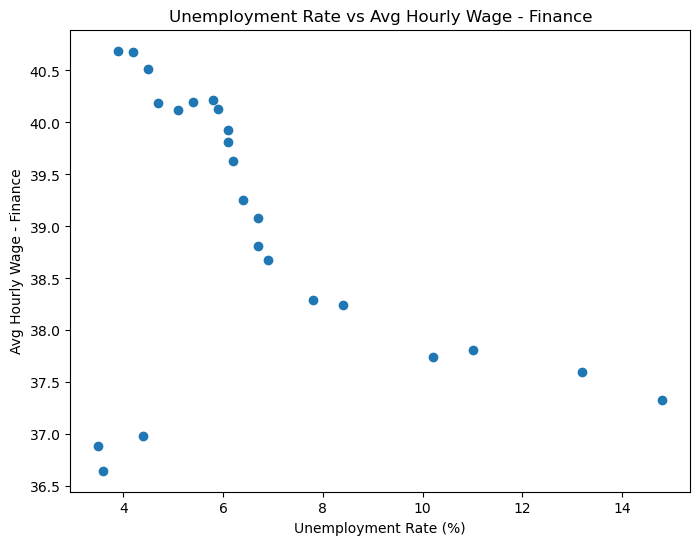

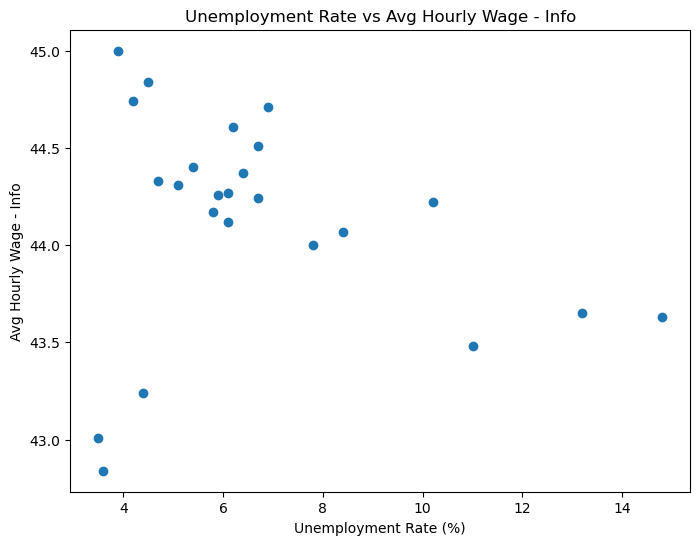

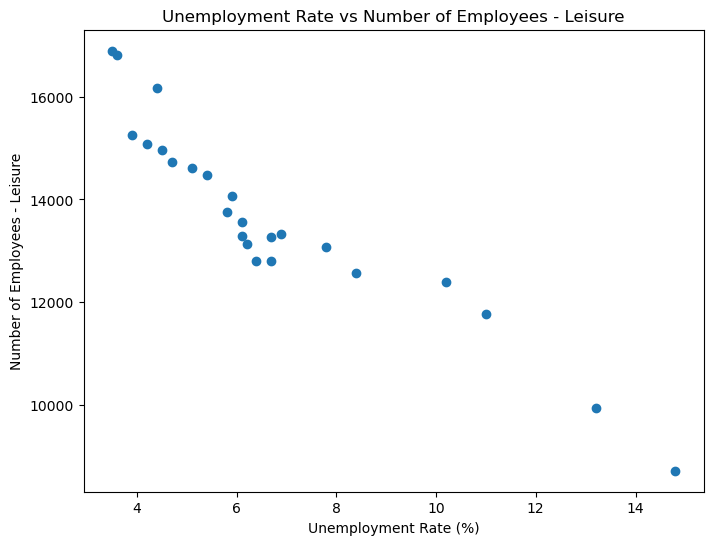

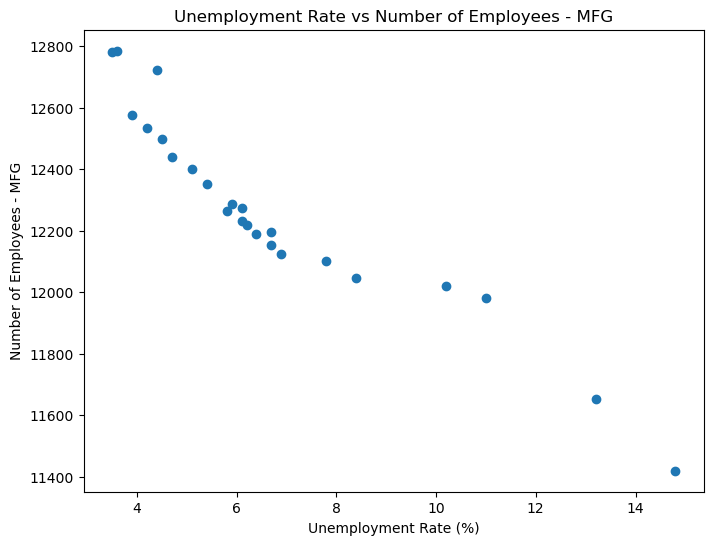

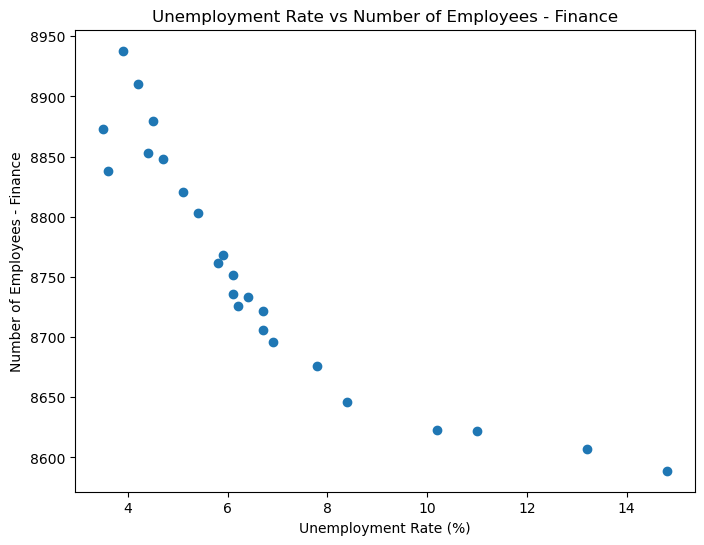

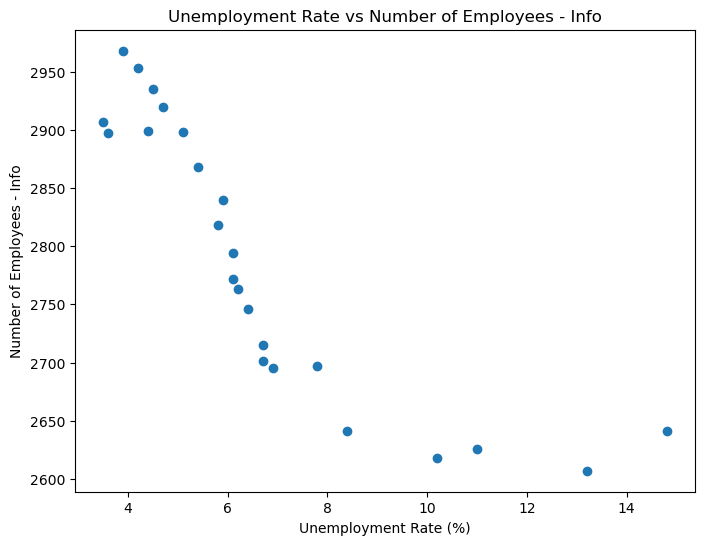

In [69]:
# Ensure the data is sorted by date
covid_period_df = covid_period_df.sort_values('Date')

# Select relevant columns for correlation analysis
data_for_corr = covid_period_df[['Unemployment Rate', 'Avg_Hourly_Wage_Leisure', 'Avg_Hourly_Wage_MFG', 'Avg_Hourly_Wage_Finance', 'Avg_Hourly_Wage_Info', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info']]

# Calculate correlation matrix
correlation_matrix = data_for_corr.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Unemployment Rate and Sector Metrics')
plt.show()

# Scatter plots for each sector's average hourly wage against unemployment rate
sectors = ['Leisure', 'MFG', 'Finance', 'Info']

for sector in sectors:
    plt.figure(figsize=(8, 6))
    plt.scatter(covid_period_df['Unemployment Rate'], covid_period_df[f'Avg_Hourly_Wage_{sector}'])
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel(f'Avg Hourly Wage - {sector}')
    plt.title(f'Unemployment Rate vs Avg Hourly Wage - {sector}')
    plt.show()

# Scatter plots for each sector's number of employees against unemployment rate
for sector in sectors:
    plt.figure(figsize=(8, 6))
    plt.scatter(covid_period_df['Unemployment Rate'], covid_period_df[f'Num_Employees_{sector}'])
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel(f'Number of Employees - {sector}')
    plt.title(f'Unemployment Rate vs Number of Employees - {sector}')
    plt.show()


Changes During COVID-19:
Unemployment Rate          83.106576
Avg_Hourly_Wage_Leisure     7.189230
Avg_Hourly_Wage_MFG         5.556224
Avg_Hourly_Wage_Finance     8.534633
Avg_Hourly_Wage_Info        4.565651
Num_Employees_Leisure     -17.771461
Num_Employees_MFG          -4.343359
Num_Employees_Finance       0.016183
Num_Employees_Info         -2.634948
dtype: float64

Changes Post COVID-19:
Unemployment Rate          -1.020408
Avg_Hourly_Wage_Leisure    24.816306
Avg_Hourly_Wage_MFG        14.423019
Avg_Hourly_Wage_Finance    18.318830
Avg_Hourly_Wage_Info       12.494323
Num_Employees_Leisure      -2.301913
Num_Employees_MFG           0.480175
Num_Employees_Finance       4.280465
Num_Employees_Info          6.329114
dtype: float64
Correlation Matrix During COVID-19:
                       Unemployment Rate  Num_Employees_Leisure  \
Unemployment Rate               1.000000              -0.940635   
Num_Employees_Leisure          -0.940635               1.000000   
Num_Employees_MFG 

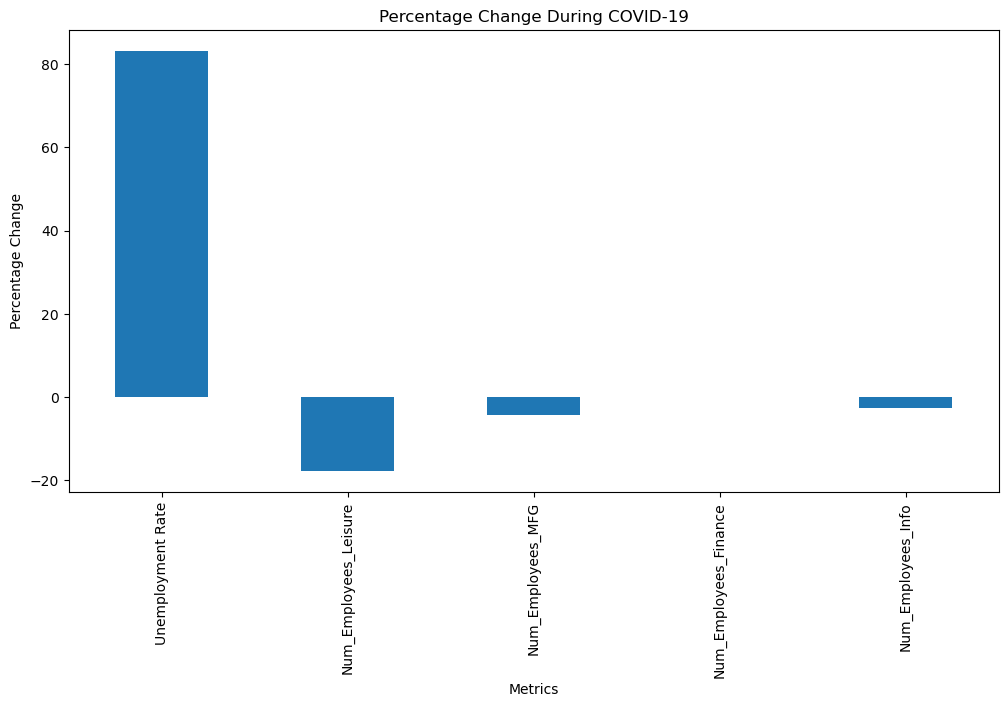

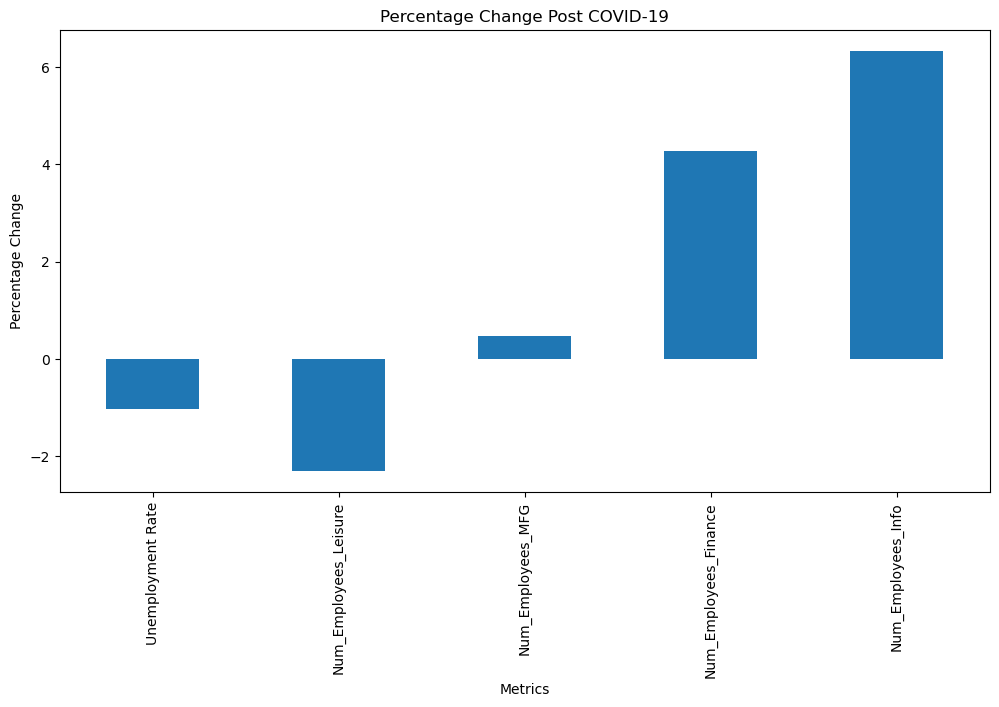

In [ ]:
pre_covid_start = '2019-01-01'
pre_covid_end = '2019-12-31'
covid_start = '2020-01-01'
covid_end = '2021-12-31'
post_covid_start = '2022-01-01'
post_covid_end = '2023-12-31'

pre_covid_df = merged_df[(merged_df['Date'] >= pre_covid_start) & (merged_df['Date'] <= pre_covid_end)]
covid_df = merged_df[(merged_df['Date'] >= covid_start) & (merged_df['Date'] <= covid_end)]
post_covid_df = merged_df[(merged_df['Date'] >= post_covid_start) & (merged_df['Date'] <= post_covid_end)]
# Select only the numeric columns for calculation
numeric_columns = ['Unemployment Rate', 'Avg_Hourly_Wage_Leisure', 'Avg_Hourly_Wage_MFG', 'Avg_Hourly_Wage_Finance', 'Avg_Hourly_Wage_Info', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info']

# Calculate mean values for each period
pre_covid_means = pre_covid_df[numeric_columns].mean()
covid_means = covid_df[numeric_columns].mean()
post_covid_means = post_covid_df[numeric_columns].mean()

# Calculate percentage changes
def calculate_change(pre, during):
    return ((during - pre) / pre) * 100

change_during_covid = calculate_change(pre_covid_means, covid_means)
change_post_covid = calculate_change(pre_covid_means, post_covid_means)

print("Changes During COVID-19:")
print(change_during_covid)
print("\nChanges Post COVID-19:")
print(change_post_covid)

# Calculate correlation between unemployment rate and sector metrics during COVID
correlation_during_covid = covid_df[['Unemployment Rate', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info']].corr()
print("Correlation Matrix During COVID-19:")
print(correlation_during_covid)
import matplotlib.pyplot as plt

# Plot changes during COVID-19
change_during_covid[['Unemployment Rate', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info']].plot(kind='bar', figsize=(12, 6))
plt.title('Percentage Change During COVID-19')
plt.ylabel('Percentage Change')
plt.xlabel('Metrics')
plt.show()

# Plot changes post COVID-19
change_post_covid[['Unemployment Rate', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info']].plot(kind='bar', figsize=(12, 6))
plt.title('Percentage Change Post COVID-19')
plt.ylabel('Percentage Change')
plt.xlabel('Metrics')
plt.show()



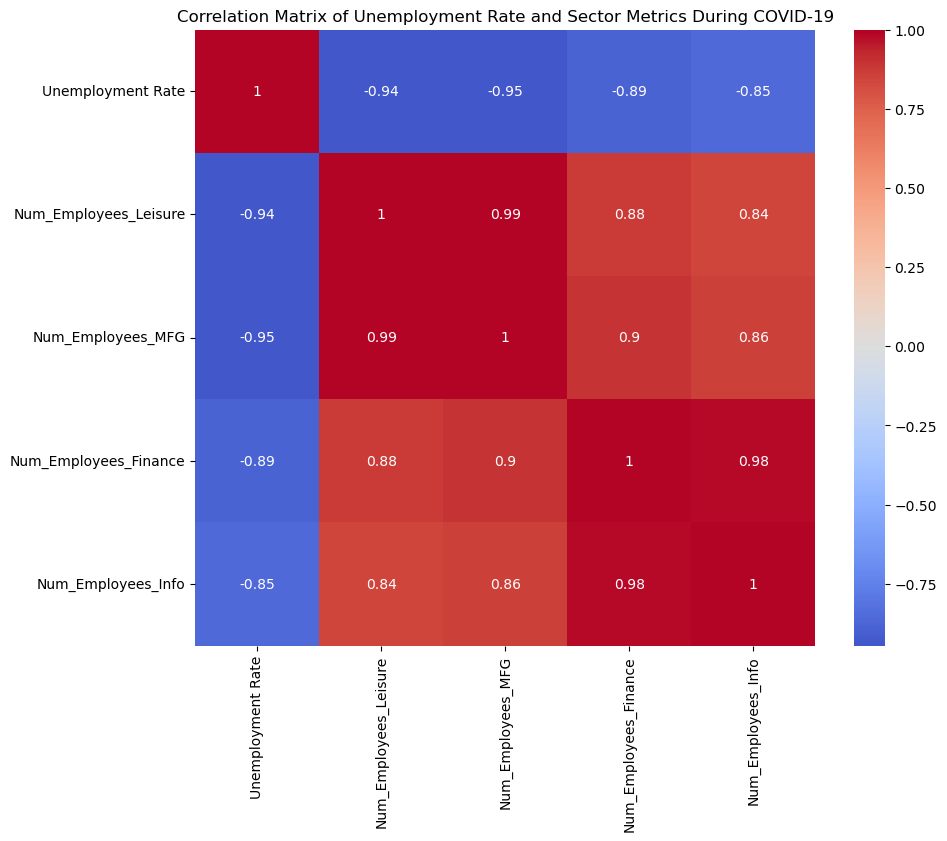

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the COVID-19 period
correlation_matrix = covid_df[['Unemployment Rate', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Unemployment Rate and Sector Metrics During COVID-19')
plt.show()


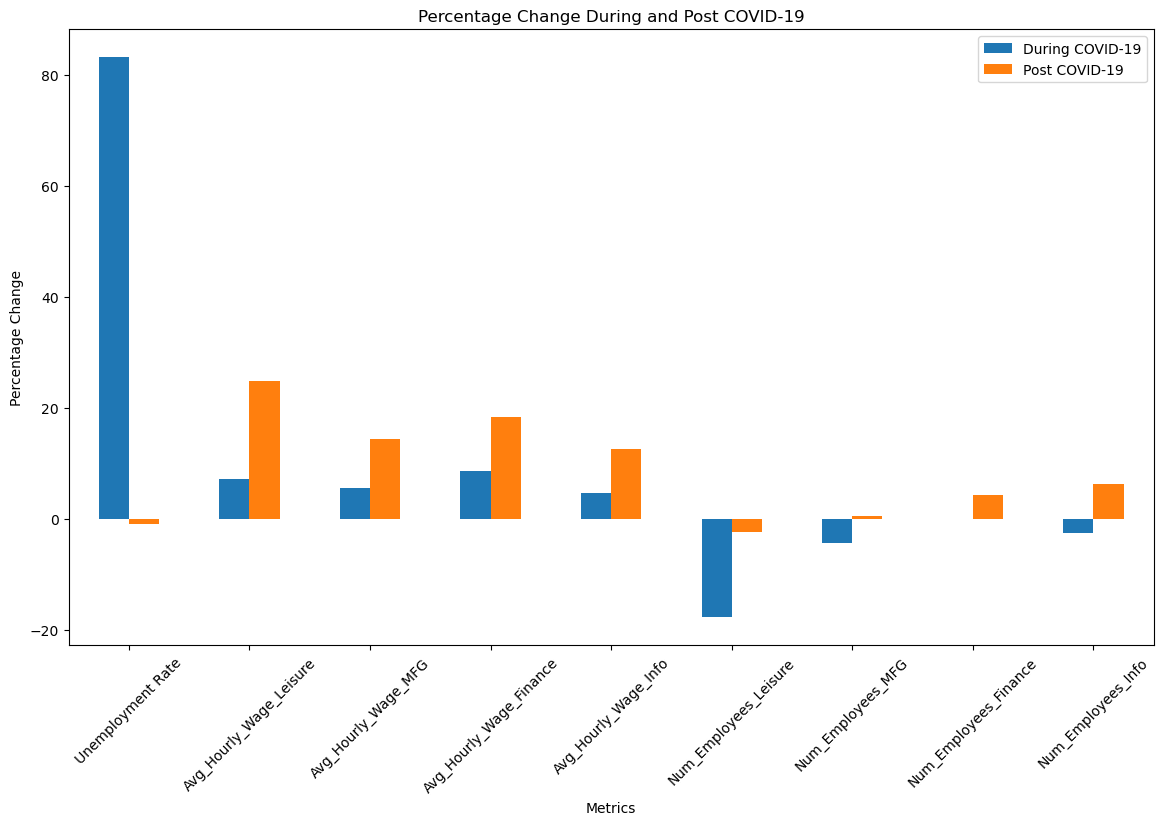

In [73]:
import matplotlib.pyplot as plt

# Combine the changes into a single DataFrame
combined_changes = pd.DataFrame({
    'During COVID-19': change_during_covid,
    'Post COVID-19': change_post_covid
})

# Plot the combined bar chart
combined_changes[['During COVID-19', 'Post COVID-19']].plot(kind='bar', figsize=(14, 8))
plt.title('Percentage Change During and Post COVID-19')
plt.ylabel('Percentage Change')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


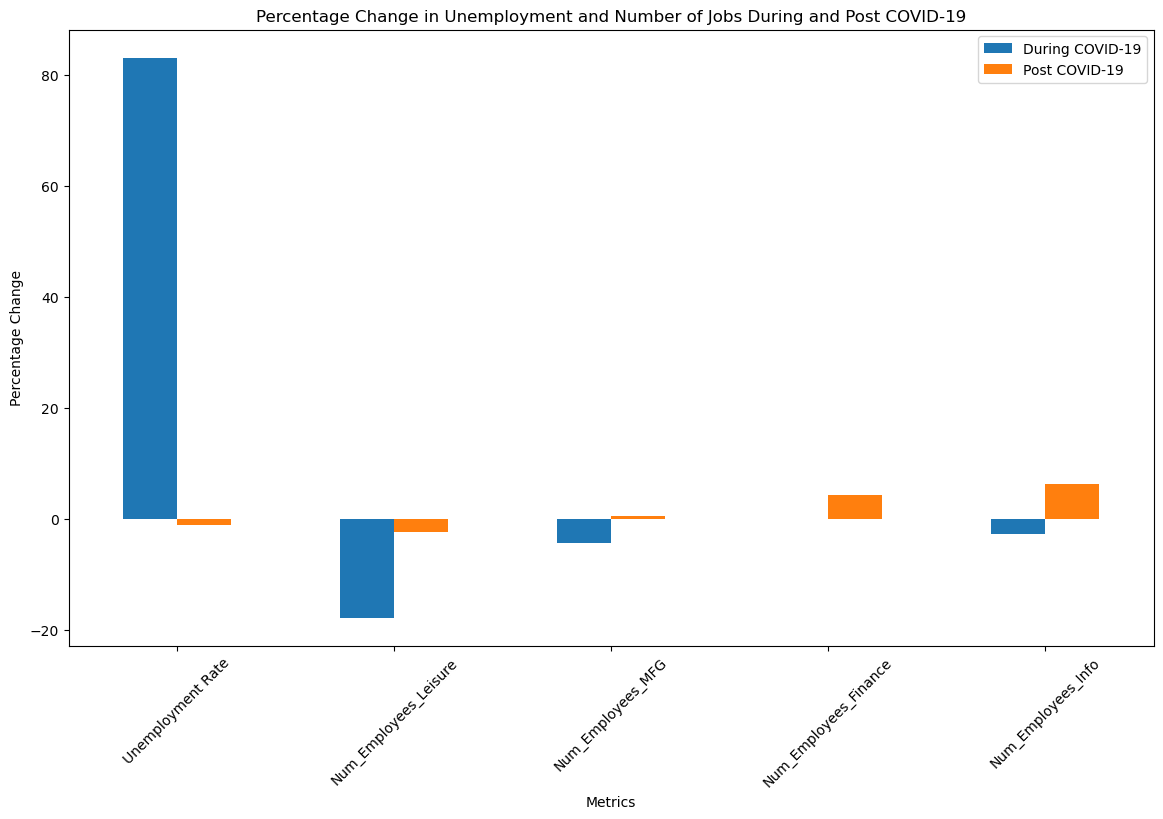

In [74]:
import matplotlib.pyplot as plt

# Combine the changes in unemployment rate and number of jobs into a single DataFrame
unemployment_and_jobs_changes = pd.DataFrame({
    'During COVID-19': change_during_covid[['Unemployment Rate', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info']],
    'Post COVID-19': change_post_covid[['Unemployment Rate', 'Num_Employees_Leisure', 'Num_Employees_MFG', 'Num_Employees_Finance', 'Num_Employees_Info']]
})

# Plot the combined bar chart for unemployment and number of jobs
unemployment_and_jobs_changes[['During COVID-19', 'Post COVID-19']].plot(kind='bar', figsize=(14, 8))
plt.title('Percentage Change in Unemployment and Number of Jobs During and Post COVID-19')
plt.ylabel('Percentage Change')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
